## Long term data analysis of RSCH outputs for thesis.
- Trends over time.
- Energy comparison. (This is the key part).

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.dates import DateFormatter
my_date_format = DateFormatter('%b-%Y') # mmm-yyyy
#plt.gcf().axes[0].xaxis.set_major_formatter(my_date_format)

mystyle = r'https://gist.githubusercontent.com/mbolt01/3087dffd11e70eccb08fdcf327374a5c/raw/std_fig'
plt.style.use(mystyle)

In [2]:
file = r'GuildfordOPAll_Corr.pkl'
all_data = pd.read_pickle(file)
all_data.head(1)

,linac_id,linac_name,install_year,name,full_date,date,device,type,energy,r1,...,rmean,temp,press,rcorr,rstd,op,comments,DateCat,op_corr,days_dif
0,1,LA1,2008,LA1 (2008),2012-11-01,2012-11-01,L00498,Linacheck,6MeV,0.444,...,0.445,23.6,726.5,0.445,0.448,-0.669643,NaN,0,-0.669643,0


In [3]:
all_data.describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,linac_id,install_year,temp,press,rcorr,op,DateCat,op_corr,days_dif
count,32678.000000,32678.000000,26509.000000,26380.000000,26509.000000,32678.000000,32678.000000,32678.000000,32678.000000
mean,3.819756,2009.041710,23.013557,1076.160024,20.294888,-0.133452,1.053247,1.031515,589.993298
std,2.381393,3.076864,34.367277,1464.812659,37.188666,0.887069,1.098443,2.400895,404.801831
min,1.000000,2005.000000,16.600000,0.000000,0.408333,-5.955722,0.000000,-4.738523,0.000000
25%,2.000000,2006.000000,NaN,NaN,NaN,-0.766667,0.000000,-0.611916,244.000000
50%,4.000000,2008.000000,NaN,NaN,NaN,-0.204646,1.000000,0.839220,511.000000
75%,5.000000,2010.000000,NaN,NaN,NaN,0.465700,2.000000,2.223717,928.000000
max,8.000000,2015.000000,2136.000000,7406.740000,102.390973,5.307000,4.000000,10.581101,1436.000000


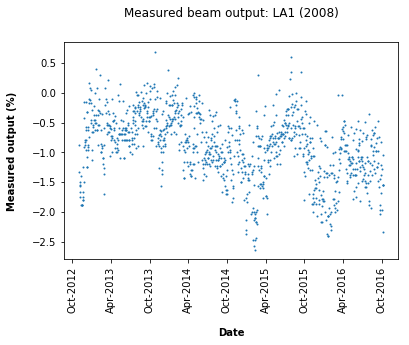

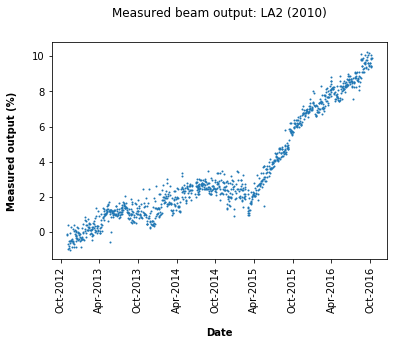

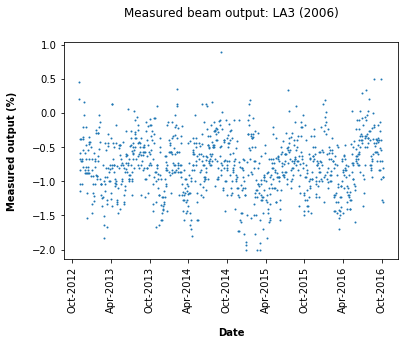

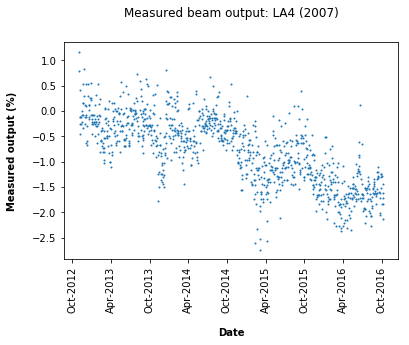

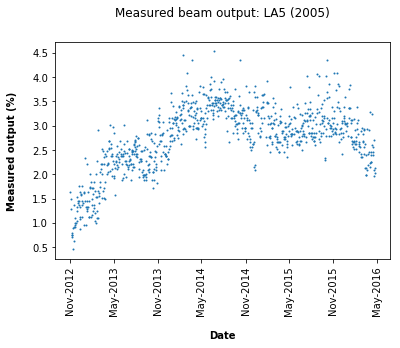

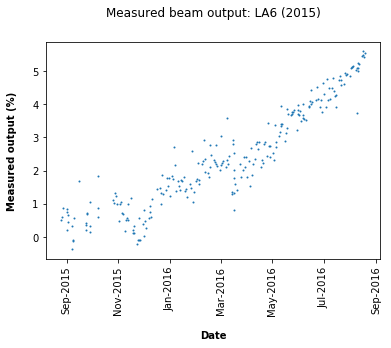

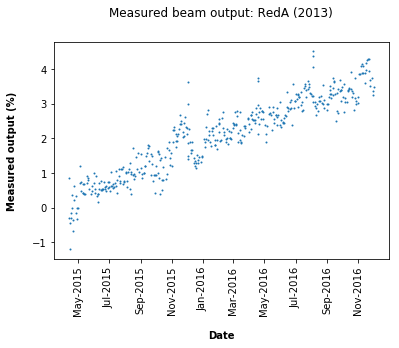

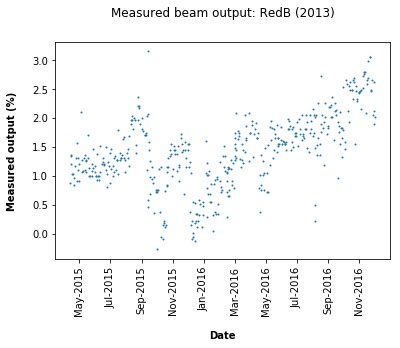

In [4]:
## plot each linacs corrected data to see if it levels off...
#the_linacs = ['RedA (2013)','RedB (2013)']
the_linacs = sorted(all_data['name'].unique())
the_energy = '6MV'
for linac in the_linacs:
    data = all_data[(all_data['name']==linac) & (all_data['energy']==the_energy)]
    plt.plot(data['date'],data['op_corr'],'o',ms=1,alpha=1)
    plt.title('Measured beam output: ' + linac)
    plt.xlabel('Date')
    plt.ylabel('Measured output (%)')
    plt.gcf().axes[0].xaxis.set_major_formatter(my_date_format)
    plt.xticks(rotation=90)
    plt.show()

## Rolling mean output

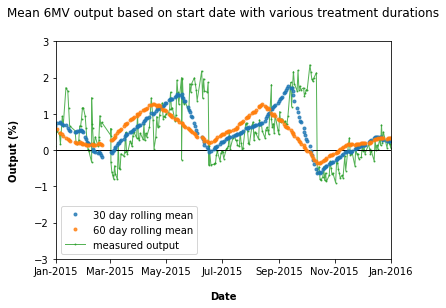

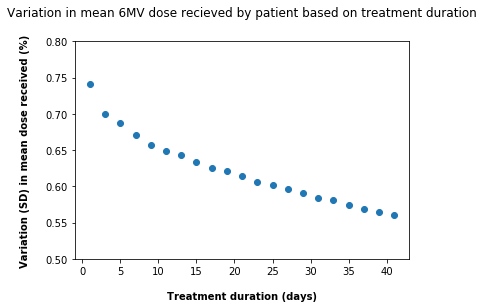

In [178]:
def get_rolling_means(all_data,linac,energy,period):
    """Function to return rolling means from specified period based on 'days_dif.
    period is specified in days
    df shoudl be filtered by energy and linac for most useful results"""

    df = all_data[(all_data['name']==linac) & (all_data['energy']==energy)] ## filter the df to get specific linac and energy
    
    rolling_means = {} ## store results in a dict
    for i in range(max(df['days_dif'])-period): ## loop to include maximum extent of data taking into account period size

        start = i ## start date
        end = start + period ## end date

        data = df[(df['days_dif']>=start) & (df['days_dif']<end)]
        if len(data) !=0: ## have to skip if no date to look at within period
            data_start_date=np.min(data['date'].values) ## get start date of period
            data_mean = np.mean(data['op'].values) ## get mean of values
            rolling_means[data_start_date] = data_mean ## store start date and rolling mean in dict

    return rolling_means


mylinac = 'LA2 (2010)'
myenergy = '6MV'
myperiod = 7

la2_6mv_7days = get_rolling_means(all_data,mylinac,myenergy,7)
la2_6mv_30days = get_rolling_means(all_data,mylinac,myenergy,30)
la2_6mv_60days = get_rolling_means(all_data,mylinac,myenergy,60)

#plt.plot(list(la2_6mv_7days.keys()),list(la2_6mv_7days.values()),'o', ms=3, label='7 day rolling mean',alpha=0.8)
plt.plot(list(la2_6mv_30days.keys()),list(la2_6mv_30days.values()),'o', ms=3, label='30 day rolling mean',alpha=0.8)
plt.plot(list(la2_6mv_60days.keys()),list(la2_6mv_60days.values()),'o', ms=3, label='60 day rolling mean',alpha=0.8)


df = all_data[(all_data['name']==mylinac) & (all_data['energy']==myenergy)]

plt.plot(df['date'],df['op'],lw=1,marker='o',ms=1, label='measured output',alpha=0.8,zorder=0)
plt.xlim('1-jan-2015','1-jan-2016')
plt.ylim(-3,3)
plt.axhline(0,lw=1,c='black',zorder=0)
plt.legend(loc='lower left',)
plt.xlabel('Date')
plt.ylabel('Output (%)')
plt.title('Mean ' + myenergy + ' output based on start date with various treatment durations')

plt.gcf().axes[0].xaxis.set_major_formatter(my_date_format)

#plt.savefig('rolling_mean_output-LA2-6MV-thesis.png',dpi=300,bbox_inches='tight')
plt.show()

# **************
## see how mean varies depending on treatment length
period_means = {}
for period in range(1,42,4):
    rolling_means = get_rolling_means(all_data,mylinac,myenergy,period)
    period_means[period] = list(rolling_means.values())
for val in period_means.keys():
    plt.plot(val,np.std(period_means[val]),'o',c='C0')
    #for i in period_means[val]:
    #    plt.plot(val,i,'o')
plt.xlabel('Treatment duration (days)')
plt.ylabel('Variation (SD) in mean dose received (%)')
plt.title('Variation in mean ' + myenergy + ' dose recieved by patient based on treatment duration')
plt.ylim(0.5,0.8)
#plt.savefig('variation in mean dose with treatment duration.png',dpi=300,bbox_inches='tight')
plt.show()

In [180]:
for period in sorted(period_means):
    print(period, np.std(period_means[period]))

1 0.741038453708
3 0.699141075355
5 0.68741407559
7 0.670722348883
9 0.657194434897
11 0.649404775585
13 0.643605599798
15 0.6340652179
17 0.625433288007
19 0.621783053301
21 0.614406540687
23 0.606231244757
25 0.60133734117
27 0.595963371314
29 0.590504695145
31 0.584286241931
33 0.580556559465
35 0.574833456642
37 0.568524945
39 0.564622299317
41 0.560341573062


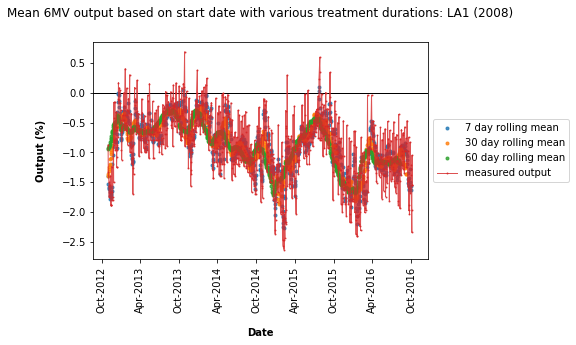

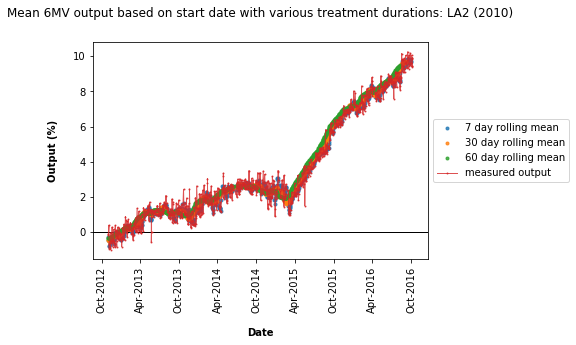

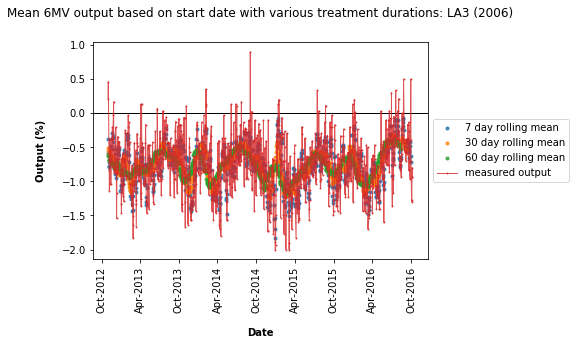

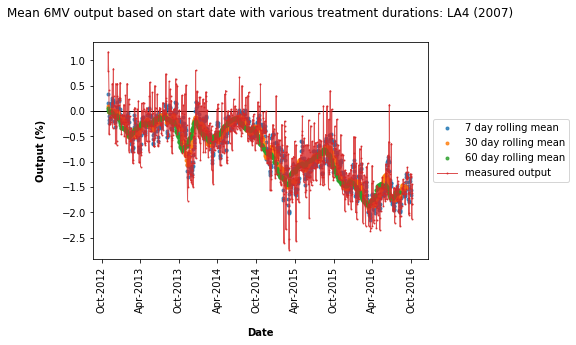

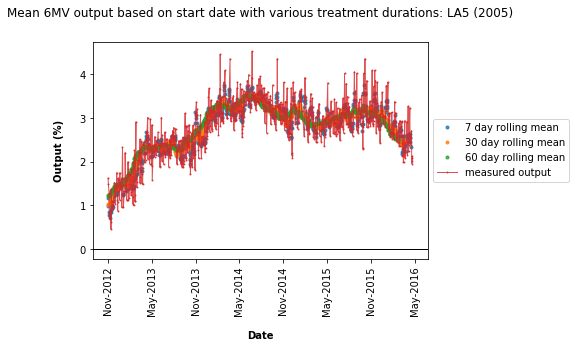

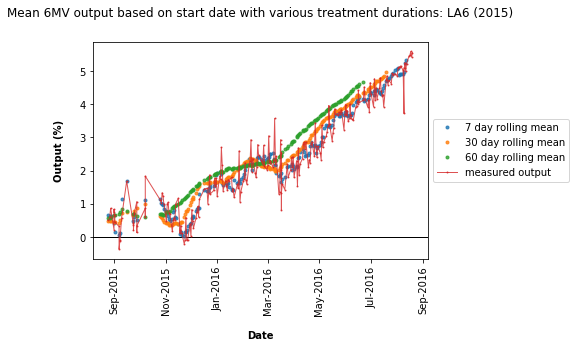

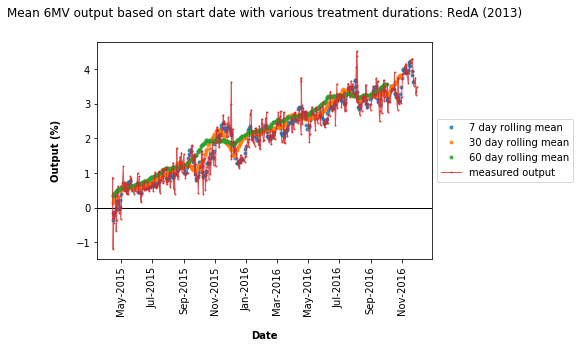

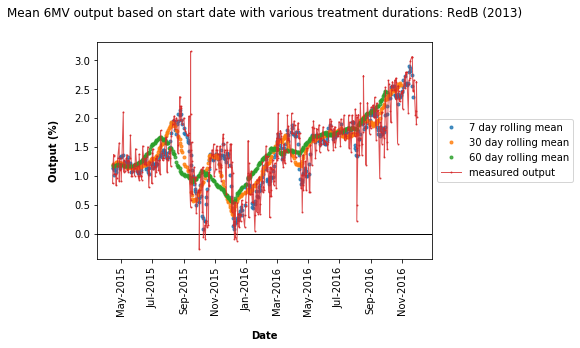

In [6]:
## same as above but for corrected output values to see if it stabalises over time...

def get_rolling_means(all_data,linac,energy,period):
    """Function to return rolling means from specified period based on 'days_dif.
    period is specified in days
    df shoudl be filtered by energy and linac for most useful results"""

    df = all_data[(all_data['name']==linac) & (all_data['energy']==energy)] ## filter the df to get specific linac and energy
    
    rolling_means = {} ## store results in a dict
    for i in range(max(df['days_dif'])-period): ## loop to include maximum extent of data taking into account period size

        start = i ## start date
        end = start + period ## end date

        data = df[(df['days_dif']>=start) & (df['days_dif']<end)]
        if len(data) !=0: ## have to skip if no date to look at within period
            data_start_date=np.min(data['date'].values) ## get start date of period
            data_mean = np.mean(data['op_corr'].values) ## get mean of values
            rolling_means[data_start_date] = data_mean ## store start date and rolling mean in dict

    return rolling_means


for mylinac in sorted(all_data['name'].unique()):

    #mylinac = 'LA2 (2010)'
    myenergy = '6MV'
    myperiod = 7

    la2_6mv_7days = get_rolling_means(all_data,mylinac,myenergy,7)
    la2_6mv_30days = get_rolling_means(all_data,mylinac,myenergy,30)
    la2_6mv_60days = get_rolling_means(all_data,mylinac,myenergy,60)

    plt.plot(list(la2_6mv_7days.keys()),list(la2_6mv_7days.values()),'o', ms=3, label='7 day rolling mean',alpha=0.8)
    plt.plot(list(la2_6mv_30days.keys()),list(la2_6mv_30days.values()),'o', ms=3, label='30 day rolling mean',alpha=0.8)
    plt.plot(list(la2_6mv_60days.keys()),list(la2_6mv_60days.values()),'o', ms=3, label='60 day rolling mean',alpha=0.8)


    df = all_data[(all_data['name']==mylinac) & (all_data['energy']==myenergy)]

    plt.plot(df['date'],df['op_corr'],lw=1,marker='o',ms=1, label='measured output',alpha=0.8)
    #plt.xlim('1-jan-2015','1-jan-2016')
    #plt.ylim(-3,3)
    plt.axhline(0,lw=1,c='black',zorder=0)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel('Date')
    plt.ylabel('Output (%)')
    plt.title('Mean ' + myenergy + ' output based on start date with various treatment durations: ' + mylinac)

    plt.gcf().axes[0].xaxis.set_major_formatter(my_date_format)
    plt.xticks(rotation=90)

    #plt.savefig('rolling_mean_output-LA2-6MV.png',dpi=300,bbox_inches='tight')
    plt.show()

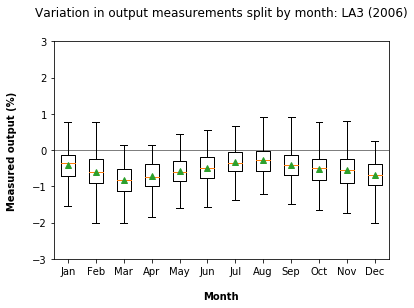

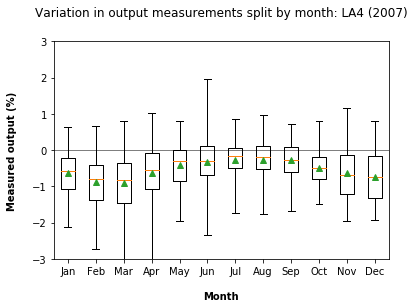

In [192]:
all_data[(all_data['name']=='LA3 (2006)')]['DateCat'].unique()

## LA3 has had no calibration through this entire dataset (Oct 2012 - OCt 2016) = 4 years
## this shows some periodicity in its data.

## take the data from each month and see if this shows the trend (mean and also do boxplots)
linac_months = {}
#for linac in sorted(all_data['name'].unique()):
for linac in ['LA3 (2006)','LA4 (2007)']:
    #linac = 'LA3 (2006)'

    la = all_data[all_data['name']==linac]
    #plt.plot(la3['date'],la3['op'])

    ## get data from each month

    months = [i for i in range(1,13)]

    ## store op for each month in a dict
    month_data = {}

    for month in months:
        data = la[la['date'].dt.month==month]['op'].tolist()
        month_data[month]=data
    linac_months[linac]=month_data

    #for month in months:
        #plt.plot(month,np.mean(month_data[month]),'o')
    month_data_lists = [month_data[month] for month in months]
    #plt.boxplot(month_data[month],positions=[month],showmeans=True,widths=0.6,labels=[month])
    plt.boxplot(month_data_lists, showmeans=True,whis='range')
    plt.xticks(months)
    plt.xlabel('Month')
    plt.ylabel('Measured output (%)')
    plt.yticks([-3,-2,-1,0,1,2,3])
    plt.ylim(-3,3)
    plt.axhline(0,color='black',ls='-',zorder=0, lw=0.5,alpha=1)
    plt.title('Variation in output measurements split by month: '+linac)
    plt.xticks(months,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    #plt.savefig('monthly output cycle-2_perc-' + linac + '.png',dpi=300,bbox_inches='tight')
    #plt.plot(all_months,la3_month_mean,label='LA3',marker='None',ls='-',alpha=0.8,ms=4,c='C0')
    #plt.plot(all_months,la4_month_mean,label='LA4',marker='None',ls='-',alpha=0.8,ms=4,c='C1')
    
    plt.show()

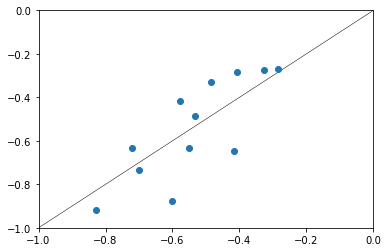

In [8]:
## see correlation between months on LA3 and 4.

the_linacs = ['LA3 (2006)', 'LA4 (2007)']

for month in months:
    ## plot mean for each linac for eahc month against each other
    plt.plot(np.mean(linac_months[the_linacs[0]][month]),np.mean(linac_months[the_linacs[1]][month]),'o',c='C0')
plt.plot([-2,2],[-2,2],lw=0.5,ls='-',c='black',zorder=0)
plt.xlim(-1,0)
plt.ylim(-1,0)
plt.show()

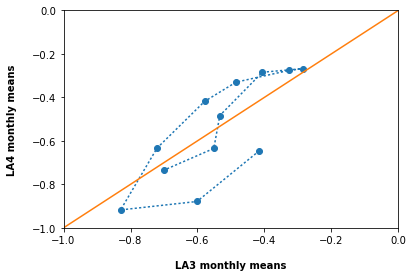

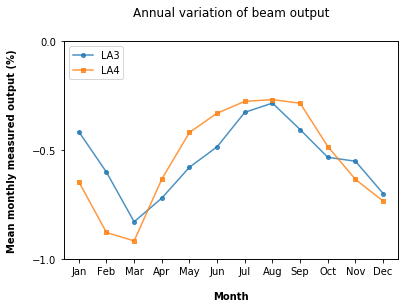

In [9]:
## plot just points for LA3 and 4 to see how closely they follow each other.
la3_month_mean = []
la4_month_mean = []
all_months = []

avg_temp = [5,7,9,11,14,16,19,19,17,13,10,7]
avg_press = []
avg_hum = [88,84,79,73,72,70,72,75,80,85,88,89]
avg_hum_inv = [100-i for i in avg_hum]

for month in months:
    la3_mean = np.mean(linac_months['LA3 (2006)'][month])
    la4_mean = np.mean(linac_months['LA4 (2007)'][month])
    all_months.append(month)
    la3_month_mean.append(la3_mean)
    la4_month_mean.append(la4_mean)

plt.plot(la3_month_mean,la4_month_mean,'o',ls=':')
plt.xlabel('LA3 monthly means')
plt.ylabel('LA4 monthly means')
plt.plot([-2,2],[-2,2])
plt.xlim(-1,0)
plt.ylim(-1,0)
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(all_months,la3_month_mean,label='LA3',marker='o',ls='-',alpha=0.8,ms=4,c='C0')
ax1.plot(all_months,la4_month_mean,label='LA4',marker='s',ls='-',alpha=0.8,ms=4,c='C1')
#ax2.plot(all_months,avg_temp,label='London temp.',marker='^',alpha=0.8,ms=4,c='C2')
#ax2.plot(all_months,avg_hum_inv,label='Mean humidity (London)',marker='^',alpha=0.8,ms=4,c='C3')
ax1.set_yticks([-1,-0.5,0])
ax1.set_xlabel('Month')
ax1.set_ylabel('Mean monthly measured output (%)')
ax1.set_xticks(months,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
#ax2.set_ylabel('Average monthly UK temperature (C)')
#ax2.set_yticks([0,5,10,15,20])
ax2.set_yticks([])
plt.title('Annual variation of beam output')
ax1.set_xticks(months,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
#plt.legend(lines1 + lines2, labels1 + labels2,loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.legend(lines1 + lines2, labels1 + labels2,loc='upper left')
plt.xticks(months,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.savefig('monthly_op_cycle_la3-4.png',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
## combine boxplots and lines for LA3 and 4 into 1 plot...



## Plot of corrected and uncorrected beam output

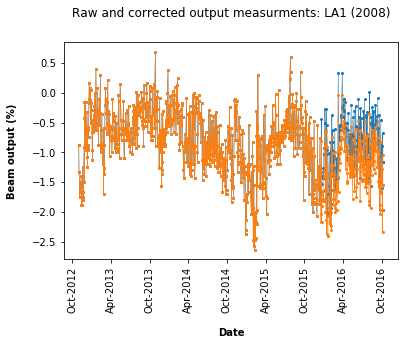

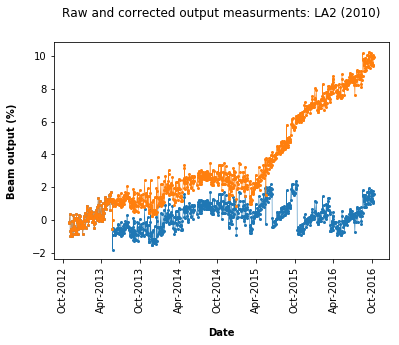

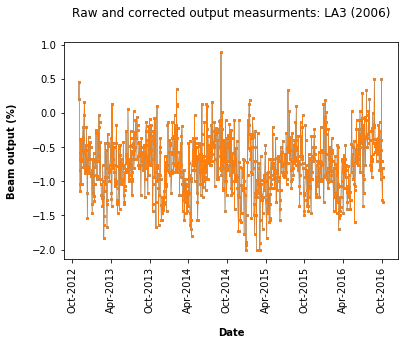

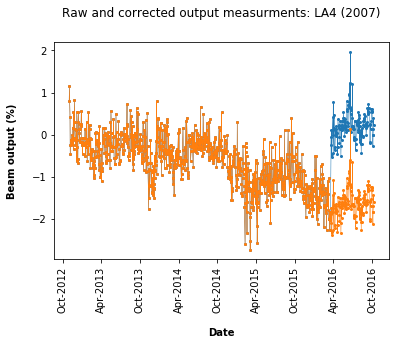

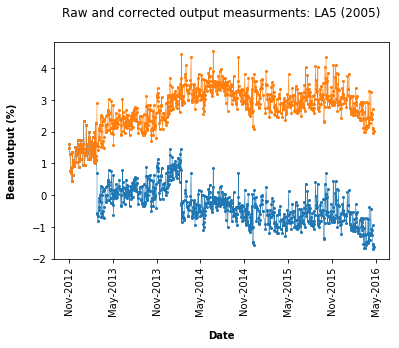

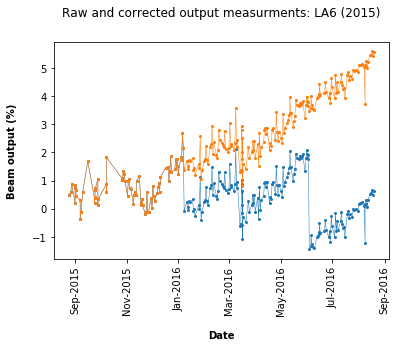

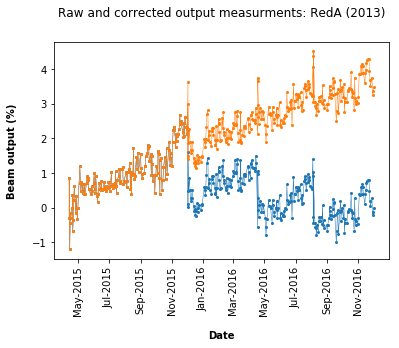

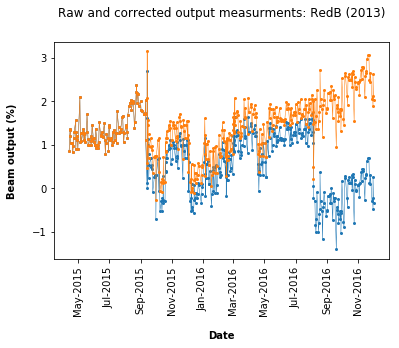

In [28]:
my_linac = 'LA2 (2010)'
my_energy = '6MV'

for my_linac in sorted(all_data['name'].unique()):

    data = all_data[(all_data['name']==my_linac) & (all_data['energy']==my_energy)]

    plt.plot(data['date'],data['op'],'o',label='Raw measurements',ms=2,ls='-',lw=0.5)
    plt.plot(data['date'],data['op_corr'],'o',label ='Corrected measurments',ms=2,ls='-',lw=0.5)
    plt.xlabel('Date')
    plt.ylabel('Beam output (%)')
    plt.gcf().axes[0].xaxis.set_major_formatter(my_date_format)
    plt.xticks(rotation=90)
    plt.title('Raw and corrected output measurments: '+my_linac)
    plt.show()

## Compare different energies

In [29]:
def comp_op_energies_plot(df,linac,e1,e2, d_start = '01-Jan-2000', d_end = '01-Jan-2100',color='blue'):
    ## get the data using the created function
    df_e1,df_e2, linac, e1, e2, d_start, d_end = comp_op_energies(df=df,
                                                                  linac=linac,
                                                                  e1=e1,
                                                                  e2=e2,
                                                                  d_start=d_start,
                                                                  d_end=d_end)
    ## produce a plot
    fig, ax = plt.subplots(1,figsize=(5, 5))
    ax.plot([-5,5],[-5,5],c='grey',ls='--')
    ax.axhline(0,c='grey')
    ax.axvline(0,c='grey')
    ax.plot(df_e1['op'],df_e2['op'],marker='o',ms=3,ls='',alpha=0.5,color=color)
    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    ax.set_xlabel(e1)
    ax.set_ylabel(e2)
    plt.title('Output Comparison: ' + str(linac))
    
    return {'df_e1':df_e1,
            'df_e2':df_e2,
            'linac':linac,
            'e1':e1,
            'e2':e2,
            'd_start':d_start,
            'd_end':d_end,
            'fig':fig,
            }

In [31]:
def comp_op_energies(df,linac,e1,e2, d_start = '01-Jan-2000', d_end = '01-Jan-2100'):
    ## get only e1 and e2 energies for comparison for specific linac
    #df_linac_e1_e2 = df[(df['linac_name']==linac) & ((df['energy']==e1) | (df['energy']==e2))]
    
    ## remove 'NaT' values from dates (shouldnt need to do this for the Guildford data)
    df = df[pd.notnull(df['date']) & (df['date'] >=d_start) & (df['date']<=d_end)]
    
    ## split into different energies for the specified linac
    df_linac_e1 = df[(df['linac_name']==linac) & (df['energy']==e1)]
    df_linac_e2 = df[(df['linac_name']==linac) & (df['energy']==e2)]
    
    a1=df_linac_e1
    a2=df_linac_e2
    
    ## filtered to remove duplicated dates (default is that only the first occurance is kept)
    df_linac_e1 = df_linac_e1.drop_duplicates(subset=['date'])
    df_linac_e2 = df_linac_e2.drop_duplicates(subset=['date'])
    
    ## fiter to only contain dates that exist for both energies
    df_linac_e1 = df_linac_e1[df_linac_e1['date'].isin(df_linac_e2['date'])]
    df_linac_e2 = df_linac_e2[df_linac_e2['date'].isin(df_linac_e1['date'])]
    
    return df_linac_e1, df_linac_e2, linac, e1, e2, d_start, d_end

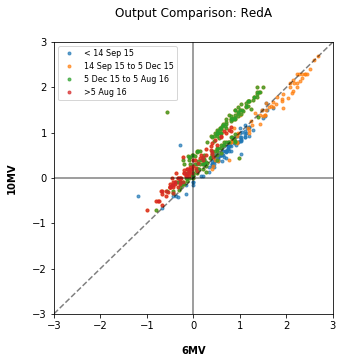

In [50]:
## produce a plot with the different calibration points (separations) indicated by different colours

data1 = all_data[(all_data['date']<='14-sep-2015')] ##  early data
data2 = all_data[(all_data['date']<='5-dec-2016') & (all_data['date']>='14-sep-2015')] ##  mid data
data2a = all_data[(all_data['date']<='5-aug-2016') & (all_data['date']>='5-dec-2015')] ##  mid data2
data3 = all_data[(all_data['date']>='5-aug-2016')] ##  late data
data4 = all_data ##  all data

#14-sep-2015
#5-dec-2015
#5-aug-2016

"""
These are the different possible ranges from teh changes in relative calibration which exits on RedB between 6 and 10MV.
1: < 14/sep/15
2: 14/sep/15 to 5/dec/15
3: 5/dec/15 to 5/aug/16
4: >5/aug/16
"""

set1 = (data1,'C0','< 14 Sep 15')
set2 = (data2,'C1','14 Sep 15 to 5 Dec 15')
set3 = (data2a,'C2','5 Dec 15 to 5 Aug 16')
set4 = (data3,'C3','>5 Aug 16')


mylinac = 'RedA'
mye1 = '6MV'
mye2 = '10MV'
plt.figure(figsize=(5,5))
for things in [set1,set2,set3,set4]:
        df_e1,df_e2, linac, e1, e2, d_start, d_end = comp_op_energies(df=things[0],
                                                                  linac=mylinac,
                                                                  e1=mye1,
                                                                  e2=mye2,
                                                                  d_start='1-jan-2000',
                                                                  d_end='1-jan-2020')
        plt.plot(df_e1['op'],df_e2['op'],marker='o',ms=3,ls='',alpha=0.7,color=things[1],label=things[2])
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.plot((-5,5),(-5,5),ls='--',marker='',color='black',alpha=0.5)
plt.axhline(0,marker='',color='black',alpha=0.5)
plt.axvline(0,marker='',color='black',alpha=0.5)
plt.xlabel(mye1)
plt.ylabel(mye2)
plt.legend(loc='upper left',numpoints=1,fontsize=8)
plt.title('Output Comparison: '+ mylinac)

10MV 1 0.877674555694
10MV 2 0.892085620035
10MV 3 0.83028406224
10MV 4 0.946786525616
****
12MeV 1 0.00961581373581
12MeV 2 0.0897937869923
12MeV 3 0.369401463143
12MeV 4 0.640403505703
****


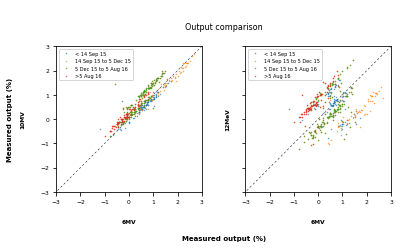

In [137]:
## put 2 plots next to each other 6MV and12MeV based on above labels etc.


mylinac1 = 'RedA'
mye1 = '6MV'
mye2 = '10MV'
mye3 = '12MeV'

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

f.subplots_adjust(wspace=0.3)

#plt.figure(figsize=(5,5))

## left plot

for my_e in [mye2,mye3]:
    
    if my_e==mye2:
        my_ax = ax1
    else:
        my_ax = ax2
    i=1
    for things in [set1,set2,set3,set4]:
            df_e1,df_e2, linac, e1, e2, d_start, d_end = comp_op_energies(df=things[0],
                                                                      linac=mylinac1,
                                                                      e1=mye1,
                                                                      e2=my_e,
                                                                      d_start='1-jan-2000',
                                                                      d_end='1-jan-2020')
            my_ax.plot(df_e1['op'],df_e2['op'],marker='o',ms=1.5,ls='',alpha=0.7,color=things[1],label=things[2],
                      markeredgecolor='None')
            
            ## do a linear regression...
            regression = stats.linregress(df_e1['op'],df_e2['op'])
            
            print(my_e,i,regression.rvalue**2)
            i=i+1

    my_ax.plot((-5,5),(-5,5),ls=':',marker='',color='black',alpha=1,zorder=0,lw=0.5)
    #my_ax.axhline(0,marker='',color='black',alpha=0.5)
    #my_ax.axvline(0,marker='',color='black',alpha=0.5)
    my_ax.set_xlabel(mye1,fontsize=6)
    my_ax.set_ylabel(my_e,fontsize=6)
    my_ax.legend(loc='upper left',numpoints=1,fontsize=5)
    my_ax.set(adjustable='box-forced', aspect='equal')
    my_ax.set_xlim(-3,3)
    my_ax.set_ylim(-3,3)
    my_ax.set_xticks([-3,-2,-1,0,1,2,3])
    my_ax.tick_params(labelsize=6)
    
    print('****')
    
f.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel("Measured output (%)", fontsize=7,labelpad=-10)
plt.ylabel("Measured output (%)", fontsize=7,labelpad=20)

plt.title('Output comparison',y=0.8,fontsize=8)

#plt.savefig('energy_correlation.png',dpi=600, bbox_inches='tight')
plt.show()

In [127]:
sorted(all_data['name'].unique())

['LA1 (2008)',
 'LA2 (2010)',
 'LA3 (2006)',
 'LA4 (2007)',
 'LA5 (2005)',
 'LA6 (2015)',
 'RedA (2013)',
 'RedB (2013)']

In [133]:
for linac in sorted(all_data['name'].unique()):
    print(linac,sorted(all_data[(all_data['name']==linac)]['energy'].unique()),
          all_data[(all_data['name']==linac)]['date'].min())

LA1 (2008) ['10MV', '12MeV', '16MeV', '20MeV', '6MV', '6MeV', '9MeV'] 2012-11-01 00:00:00
LA2 (2010) ['10MV', '12MeV', '16MeV', '20MeV', '6MV', '6MeV', '9MeV'] 2012-11-01 00:00:00
LA3 (2006) ['15MV', '6MV'] 2012-11-01 00:00:00
LA4 (2007) ['15MV', '6MV'] 2012-11-01 00:00:00
LA5 (2005) ['10MV', '12MeV', '16MeV', '20MeV', '6MV', '6MeV', '9MeV'] 2012-11-01 00:00:00
LA6 (2015) ['10FFF', '10MV', '12MeV', '16MeV', '20MeV', '6FFF', '6MV', '6MeV', '9MeV'] 2015-08-25 00:00:00
RedA (2013) ['10MV', '12MeV', '15MV', '16MeV', '6MV', '6MeV', '9MeV'] 2015-04-14 00:00:00
RedB (2013) ['10MV', '12MeV', '15MV', '16MeV', '6MV', '6MeV', '9MeV'] 2015-04-14 00:00:00


 ## Plot of gradients for each linac - is oldest most stable...?

In [139]:
do_plot=False
save_plot=False

linacs = sorted(all_data['name'].unique())
#linacs = ['LA2 (2010)']

op_corr_fit_results = {}

for linac in linacs:
    e_dict = {}
    energies = sorted(all_data[all_data['name']==linac]['energy'].unique())
    #energies = ['6MV']
    for energy in energies:
        ## get my x and y data from the full df
        my_x = all_data[(all_data['name']==linac) & (all_data['energy']==energy)]['days_dif']
        my_y = all_data[(all_data['name']==linac) & (all_data['energy']==energy)]['op_corr']
        my_y2 = all_data[(all_data['name']==linac) & (all_data['energy']==energy)]['op']
        ## do the linear regression
        fit_output = stats.linregress(my_x, my_y)
        slope, intercept, r_value, p_value, slope_std_error = fit_output
        
        fit_output2 = stats.linregress(my_x, my_y2)
        slope2, intercept2, r_value2, p_value2, slope_std_error2 = fit_output2

        ## save fit results into a dict
        print(linac,energy,slope*365, intercept)
        e_dict[energy]={'slope':slope,
                        'intercept':intercept,
                        'r_value':r_value,
                        'p_value':p_value,
                        'slope_std_error':slope_std_error}
        op_corr_fit_results[linac] = e_dict

        ## plot results
        if do_plot == True:
            fit_y = polyval([slope,intercept],my_x)
            fit_y2 = polyval([slope2,intercept2],my_x)
            
            datalabel = 'corrected (Grad = ' + str(round(slope*365,1)) + '%/yr)'
            datalabel2 = 'corrected (Grad = ' + str(round(slope2*365,1)) + '%/yr)' 
            
            plt.plot(my_x,my_y,marker='o',lw=0.5,ms=2,alpha=0.6,color='blue',label = datalabel)
            plt.plot(my_x, fit_y, color='blue', linewidth=2,alpha=0.6)
            plt.title(linac + ' - ' + energy)
            plt.axhline(0,color='black',alpha=0.5)
            plt.xlabel('Days Since First Measurement')
            plt.ylabel('Corrected Output (%)')
            
            plt.plot(my_x,my_y2,marker='o',lw=0.5,ms=2,alpha=0.6,color='green', label = datalabel2)
            plt.plot(my_x, fit_y2, color='green', linewidth=2,alpha=0.6)
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=8)
            
            if save_plot == True:
                plt.savefig((r'C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython\LongTermOP\Plots-Grad\corr_op_fit-'+str(linac)+'-'+str(energy)+'-comparison.png'),
                            dpi=300,
                            bbox_inches='tight')
                plt.close()
            else:
                plt.show()

LA1 (2008) 10MV -0.341263937069 -0.323964783341
LA1 (2008) 12MeV -0.62124035154 -1.00543060541
LA1 (2008) 16MeV -0.41292114035 -0.368387918024
LA1 (2008) 20MeV -0.644029784662 -0.311597428648
LA1 (2008) 6MV -0.194417788158 -0.510996053563
LA1 (2008) 6MeV -0.347260231752 -1.51455349169
LA1 (2008) 9MeV -0.729458277949 -0.645587145157
LA2 (2010) 10MV 2.45937118214 -1.27842521329
LA2 (2010) 12MeV 1.93201952785 -1.1883407783
LA2 (2010) 16MeV 2.1660857682 -1.34803142386
LA2 (2010) 20MeV 2.33430463332 -0.596462003874
LA2 (2010) 6MV 2.38204387381 -1.22720654593
LA2 (2010) 6MeV 1.93960583664 -1.6630816368
LA2 (2010) 9MeV 1.83231266596 -0.565835416089
LA3 (2006) 15MV 0.0303704252065 -0.3651822226
LA3 (2006) 6MV 0.00871094705857 -0.776079655405
LA4 (2007) 15MV -0.492727102379 0.199448245039
LA4 (2007) 6MV -0.435046785992 0.0776875694692
LA5 (2005) 10MV 0.387876121562 0.497040108504
LA5 (2005) 12MeV 0.247435527615 0.0790913964341
LA5 (2005) 16MeV 0.376315732556 0.426796857137
LA5 (2005) 20MeV 0.54

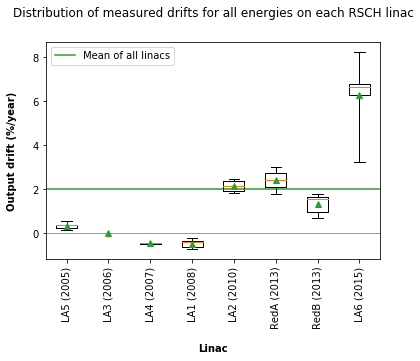

mean 1.99777174327
median 1.72359308732


In [169]:
## box plots of the gradients for each linac

linacs = sorted(all_data['name'].unique())
linacs = ['LA5 (2005)',
          'LA3 (2006)',
          'LA4 (2007)',
          'LA1 (2008)',
          'LA2 (2010)',
          'RedA (2013)',
          'RedB (2013)',
          'LA6 (2015)',
          ]

e_grads = {}

for linac in linacs:
    energies = sorted(all_data[all_data['name']==linac]['energy'].unique())
    grads = []
    for energy in energies:
        grad_val = op_corr_fit_results[linac][energy]['slope']
        grads.append(grad_val*365.25)
    e_grads[linac] = grads
    #print(linac,grads)

## put boxplot for all energies on single figure
boxplot_data = []
for linac in linacs:
    boxplot_data.append(e_grads[linac])

## add all data as a seperate dateset as comparison
add_all = False
all_grads = [item for sublist in boxplot_data for item in sublist]
if add_all == True:
    boxplot_data.append(all_grads)

    plt_labels = linacs
    plt_labels.append('All')
else:
    plt_labels = linacs
    
all_mean = np.mean(all_grads)
all_median = np.median(all_grads)
    
plt.boxplot(boxplot_data,showmeans=True,positions=[1,2,3,4,5,6,7,8],labels = plt_labels,vert=1, whis='range') # whis = 'range'/ [5,95]

plt.xlabel('Linac')
plt.ylabel('Output drift (%/year)')
plt.axhline(0,color='black',alpha=0.8,lw=0.5)
plt.axhline(all_mean,color='green',alpha=0.8, label = 'Mean of all linacs')
#plt.axhline(all_median,color='red',alpha=0.8, label = 'Median')
plt.title('Distribution of measured drifts for all energies on each RSCH linac')
plt.legend(loc='upper left')
plt.xticks(rotation=90)


#plt.savefig(('Long_term_gradients_linac.png'),dpi=300,bbox_inches='tight')

plt.show()
print('mean',all_mean)
print('median', all_median)

In [144]:
linacs

['LA1 (2008)',
 'LA2 (2010)',
 'LA3 (2006)',
 'LA4 (2007)',
 'LA5 (2005)',
 'LA6 (2015)',
 'RedA (2013)',
 'RedB (2013)',
 'All']